<a href="https://colab.research.google.com/github/amshaheen16/FILM-RECOMENDATION/blob/main/O_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder ,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

'id' : id
<br>
'Gender' : Gender
<br>
'Age' : Age
<br>
'Height' : Height is in meter
<br>
'Weight' : Weight is between 39 to 165
<br>
'family_history_with_overweight' : family history with overweight yes
 or no
 <br>
'FAVC' : Frequent consumption of high calorie food yes or no
<br>
'FCVC' : Frequency of consumption of vegetables yes or no
<br>
'NCP' : Number of main meals
<br>
'CAEC' : Consumption of food between meals
<br>
'SMOKE' : yes or no
<br>
'CH2O' : Consumption of water daily
<br>
'SCC' : Calories consumption monitoring yes or no
<br>
'FAF' : Physical activity frequency
<br>
'TUE' : Time using technology devices "How long using technology
devices to track your health"
<br>
'CALC' : Consumption of alcohol
<br>
'MTRANS' : Transportation used
<br>
'NObeyesdad' : Target Obesity

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c playground-series-s4e2


  0% 0.00/917k [00:00<?, ?B/s]
100% 917k/917k [00:00<00:00, 72.4MB/s]


In [ ]:
!unzip /content/playground-series-s4e2.zip

Archive:  /content/playground-series-s4e2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df=pd.read_csv('/content/train.csv')

In [ ]:
df_test = pd.read_csv('test.csv')

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df_test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [ ]:
df.shape

(20758, 18)

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [ ]:
df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
target_counts = df['NObeyesdad'].value_counts()
target_counts

,count
NObeyesdad,
Obesity_Type_III,4046
Obesity_Type_II,3248
Normal_Weight,3082
Obesity_Type_I,2910
Insufficient_Weight,2523
Overweight_Level_II,2522
Overweight_Level_I,2427


In [ ]:
target_counts.index

Index(['Obesity_Type_III', 'Obesity_Type_II', 'Normal_Weight',
       'Obesity_Type_I', 'Insufficient_Weight', 'Overweight_Level_II',
       'Overweight_Level_I'],
      dtype='object', name='NObeyesdad')

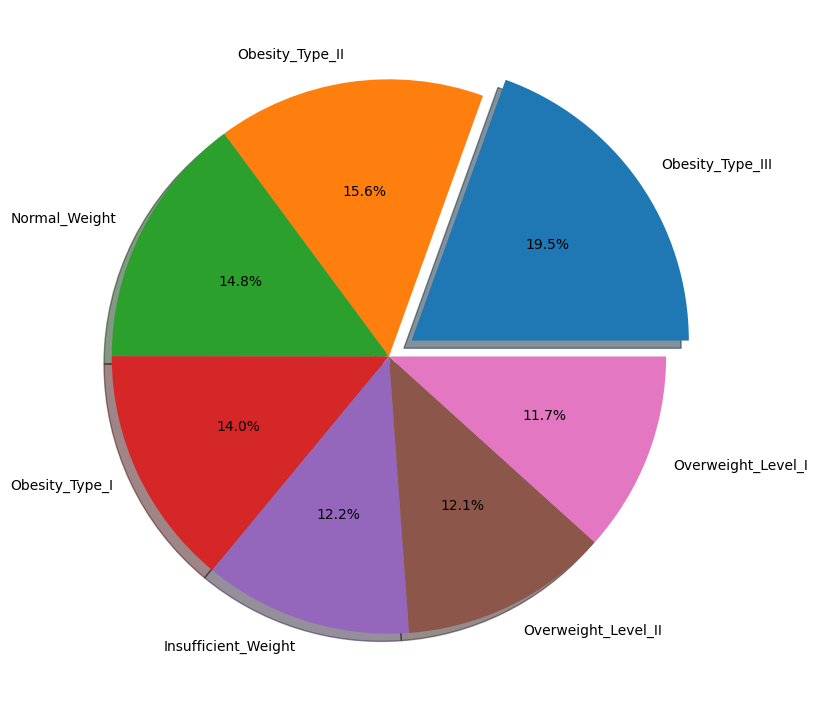

In [ ]:
plt.figure(figsize=(12,9))
plt.pie(target_counts , labels =target_counts.index , autopct='%1.1f%%' , shadow=True ,explode =(0.1, 0, 0, 0,0,0,0))
plt.show()

In [ ]:
num_cols = set(df.describe().columns) - {'id'}
num_cols

{'Age', 'CH2O', 'FAF', 'FCVC', 'Height', 'NCP', 'TUE', 'Weight'}

In [ ]:
categorical_cols = set(df) - num_cols -{'id'}
categorical_cols

{'CAEC',
 'CALC',
 'FAVC',
 'Gender',
 'MTRANS',
 'NObeyesdad',
 'SCC',
 'SMOKE',
 'family_history_with_overweight'}

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,10422
Male,10336


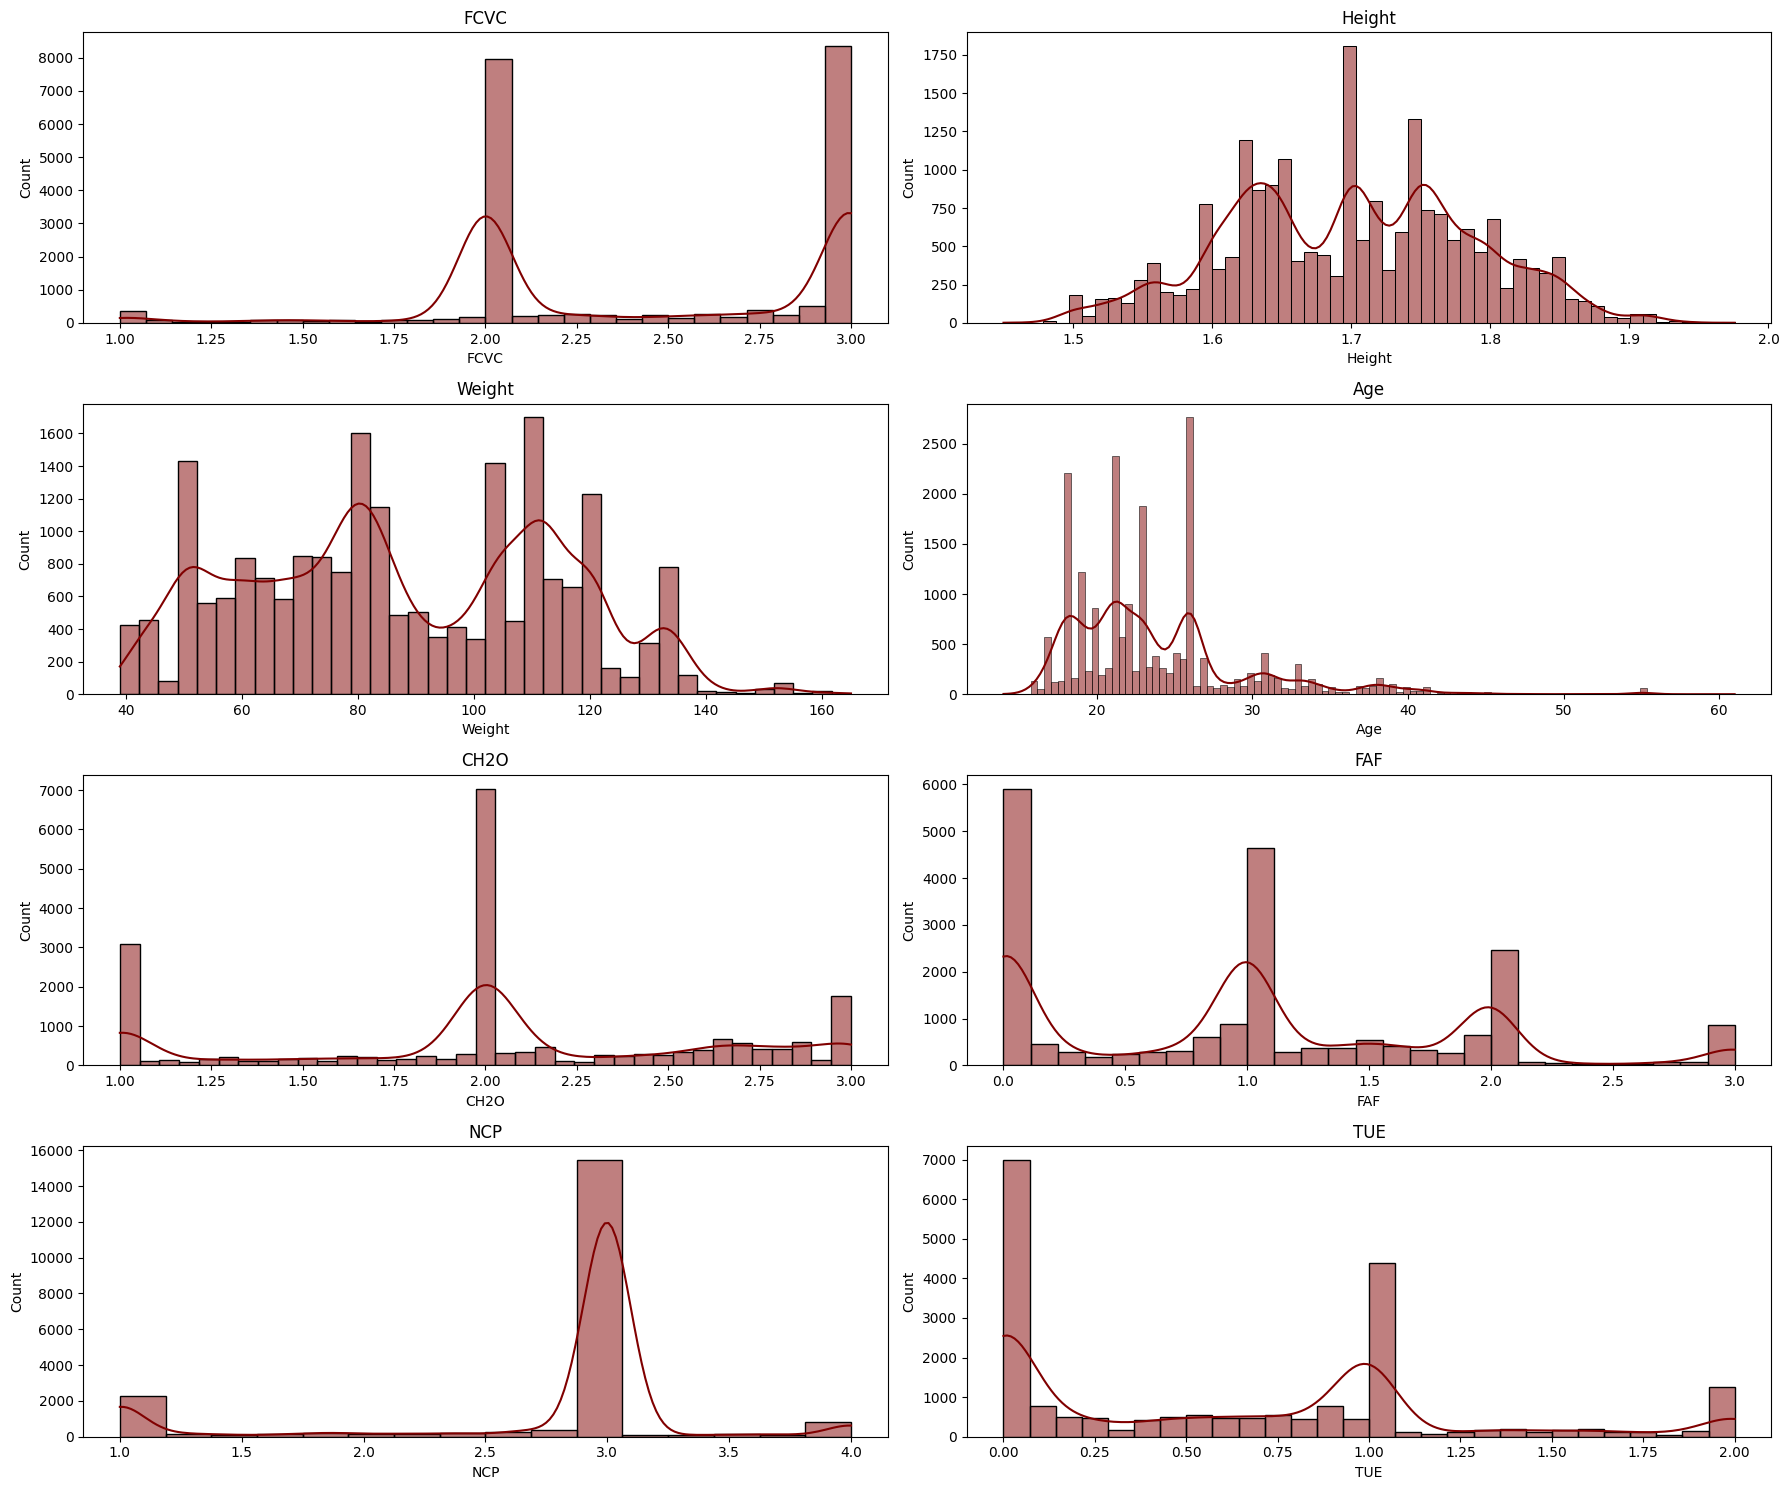

In [ ]:
plt.figure(figsize=(18, 15))
for i, column in enumerate(num_cols):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sns.histplot(df[column], kde=True, color='maroon')
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


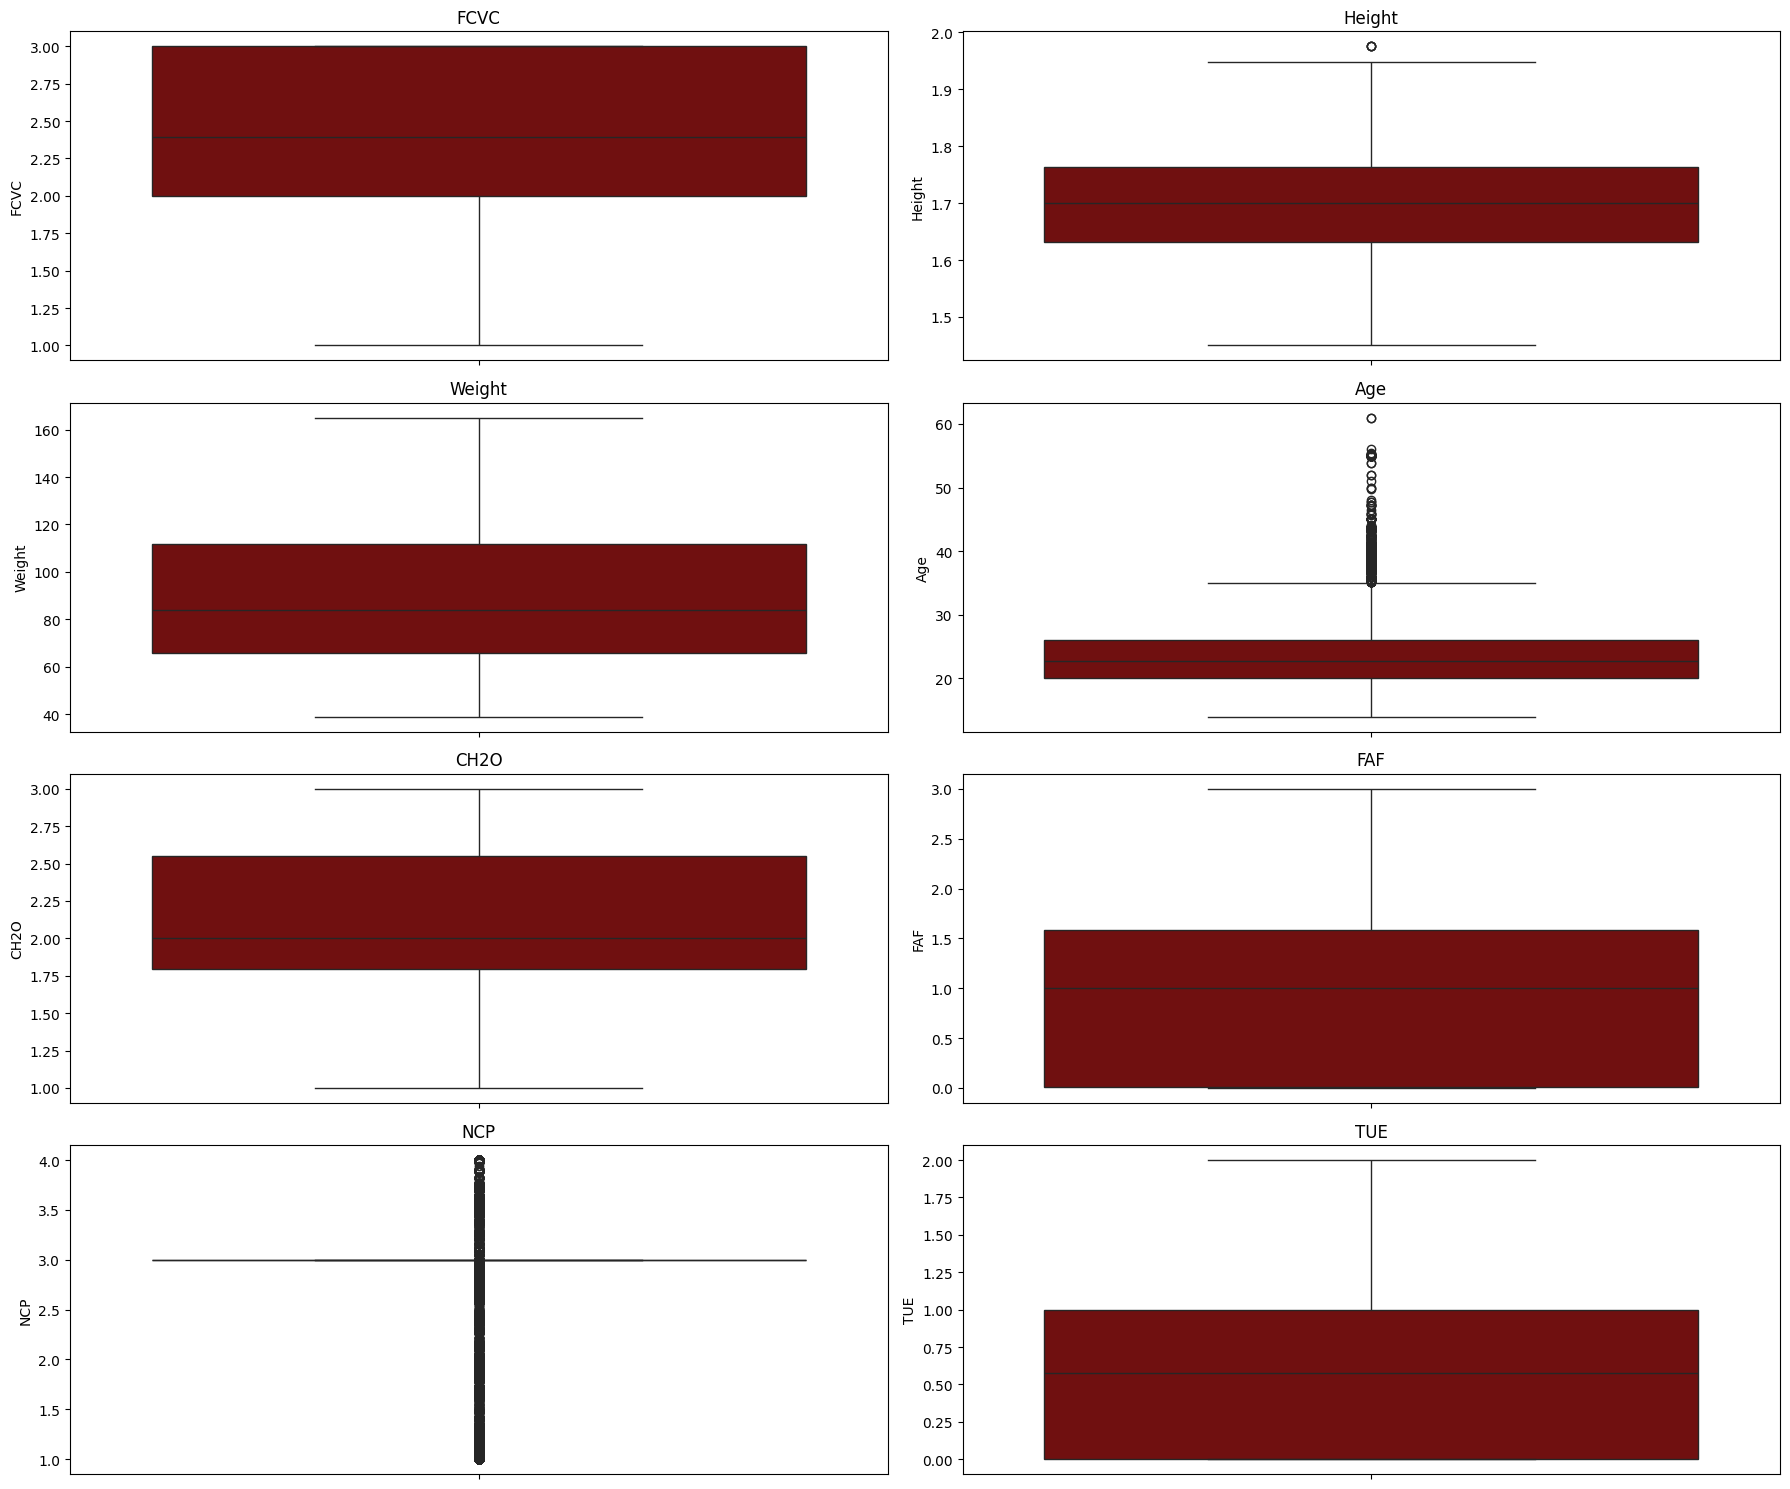

In [ ]:
plt.figure(figsize=(18, 15))
for i, column in enumerate(num_cols):
    plt.subplot(4, 2, i + 1)  # 4 rows, 2 columns
    sns.boxplot(df[column], color='maroon')
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


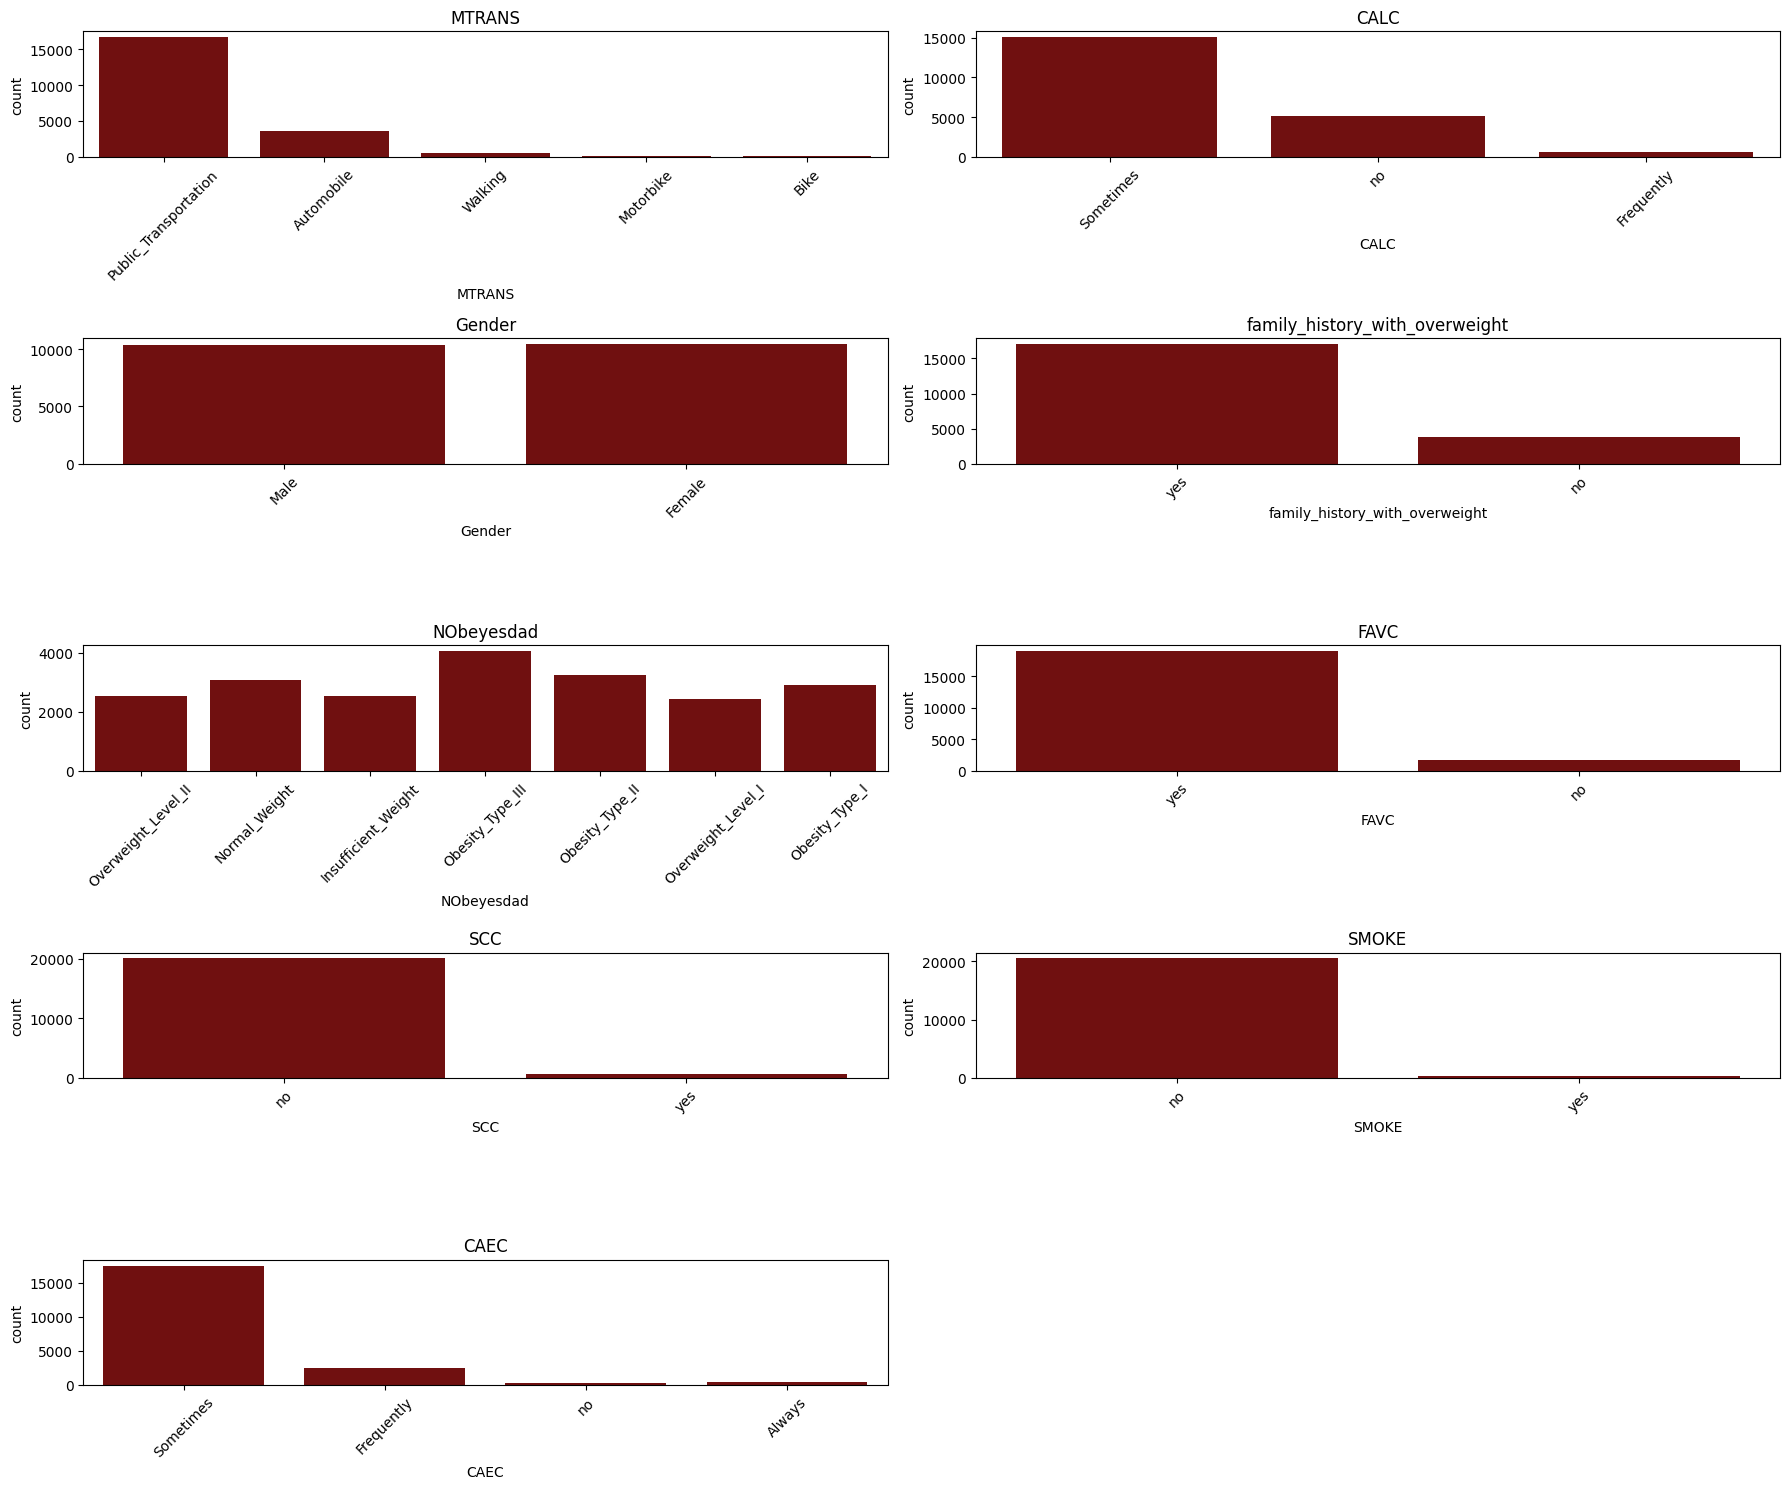

In [ ]:
plt.figure(figsize=(18, 15))
for i, column in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)  # 5 rows, 2 columns
    sns.countplot(data=df, x=column, color='maroon')
    plt.title(column)
    plt.xticks(rotation=45)
    plt.title(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

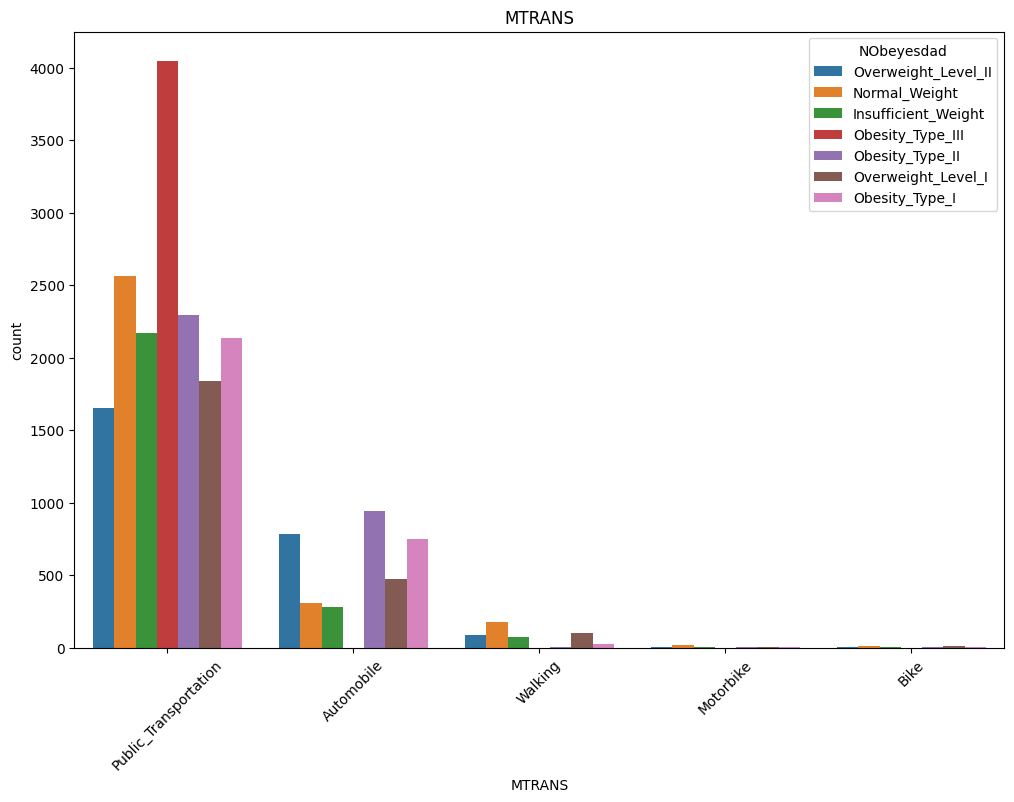

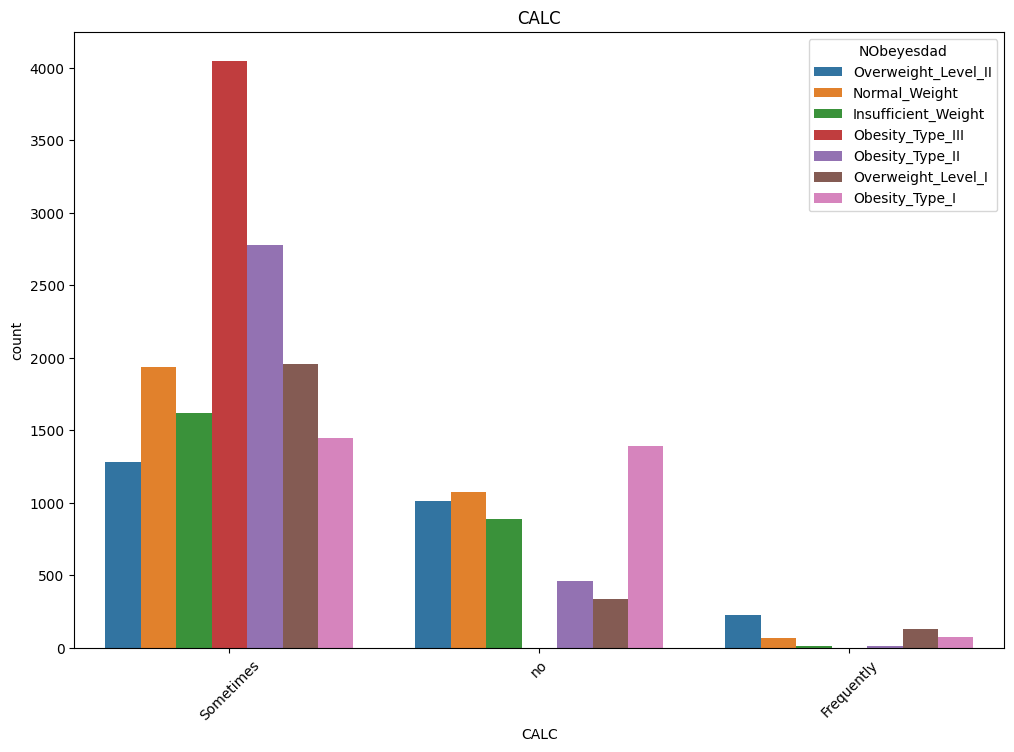

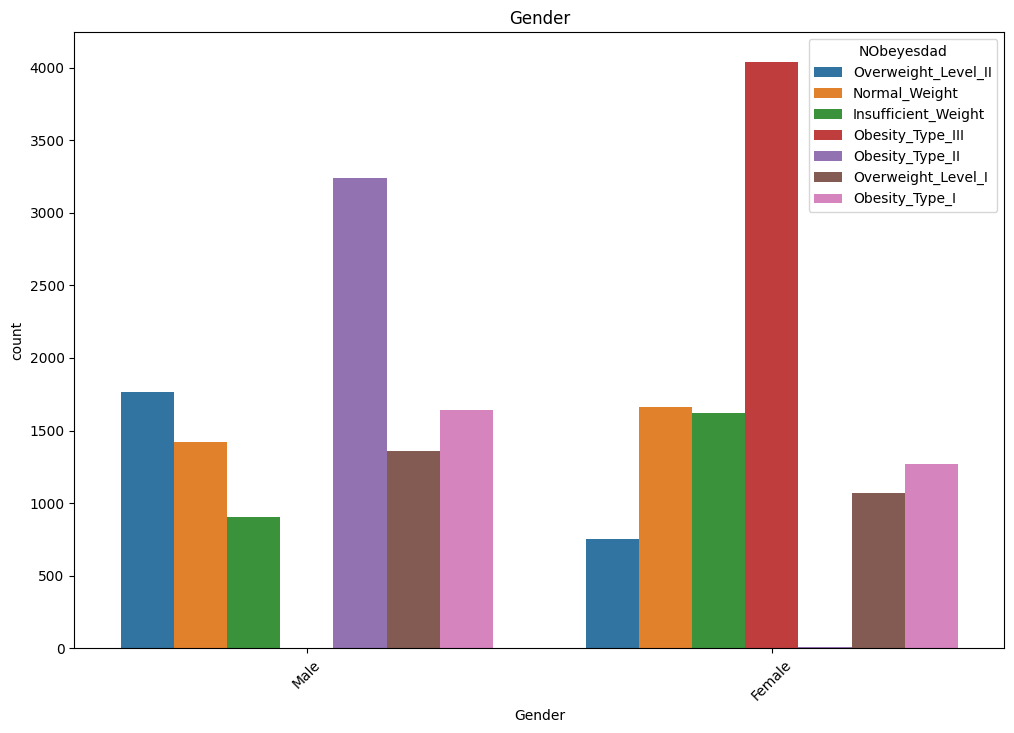

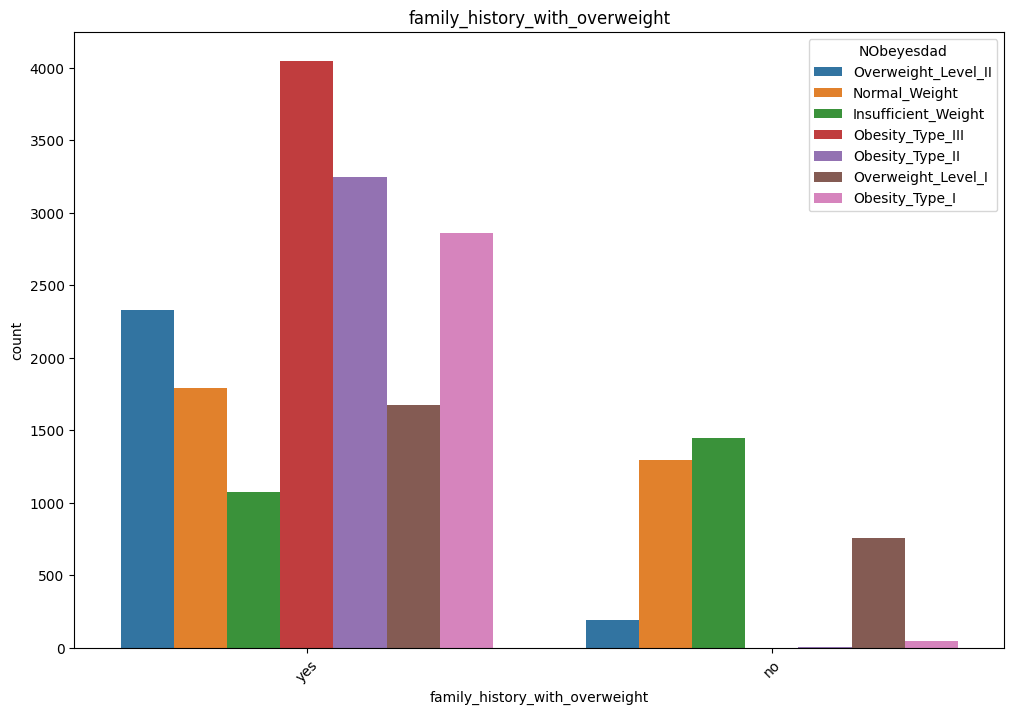

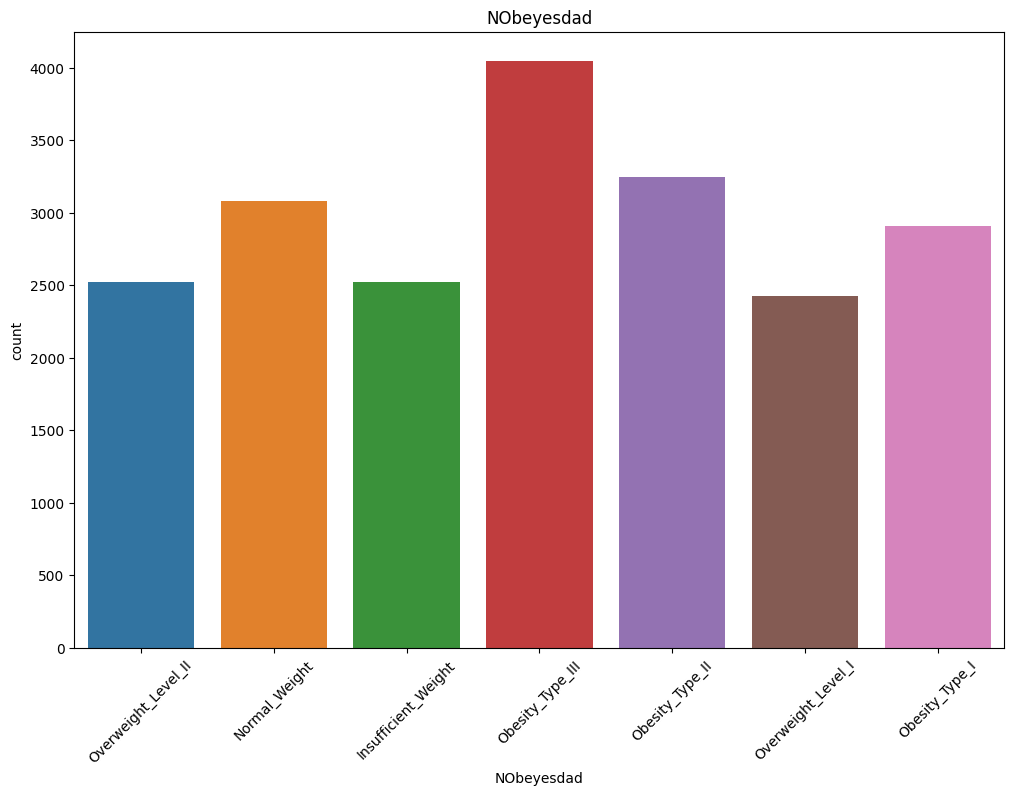

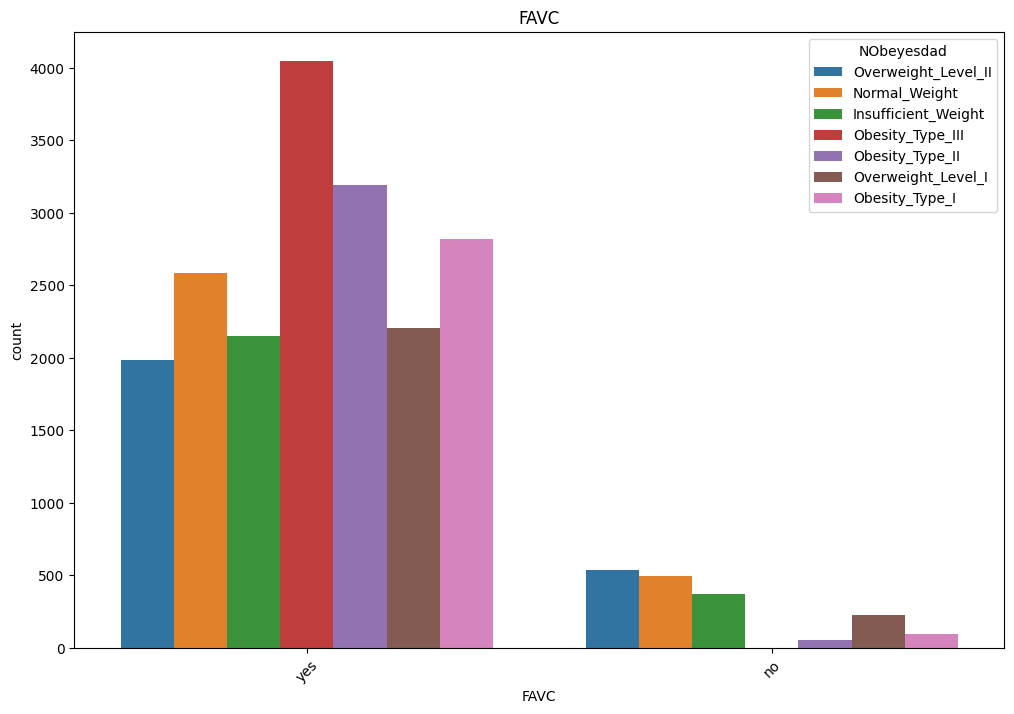

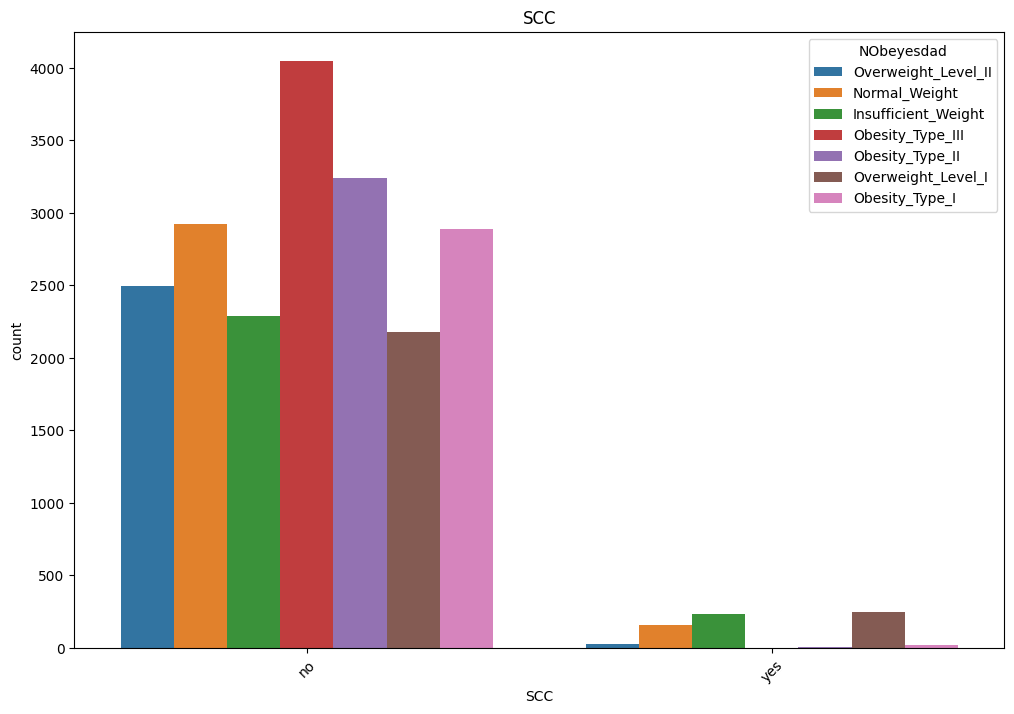

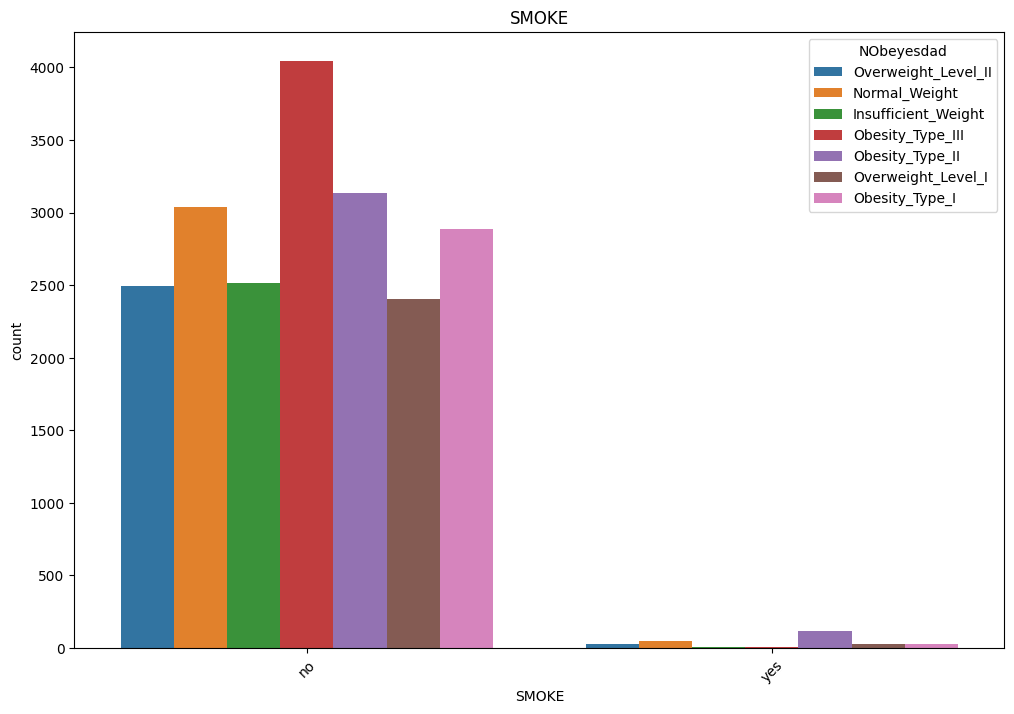

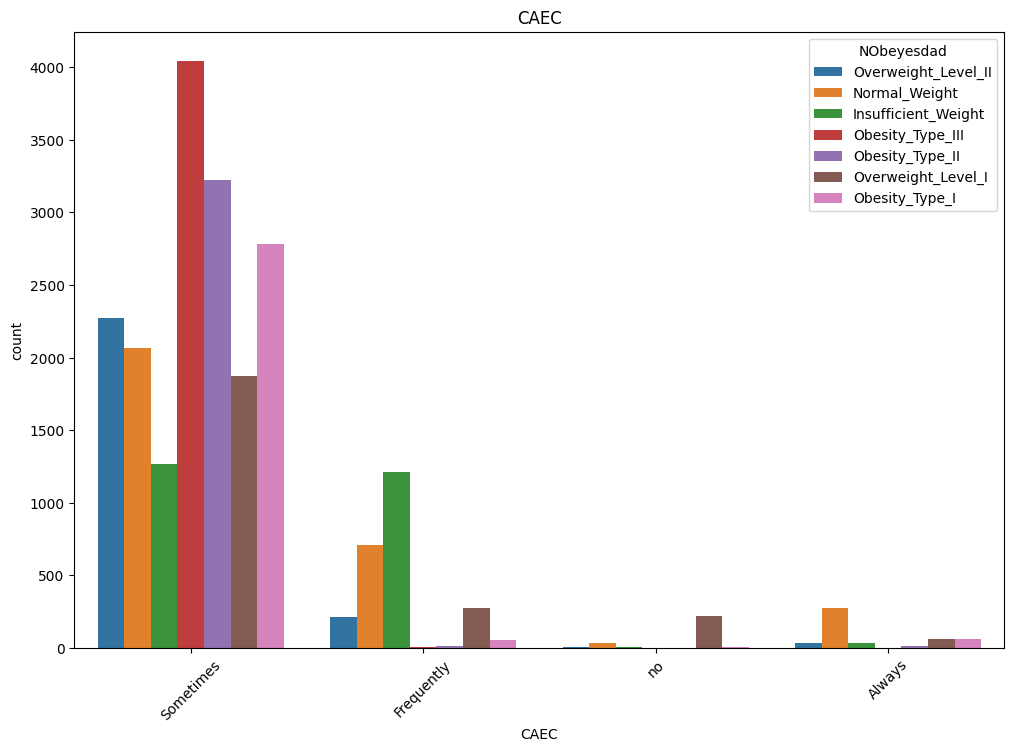

In [ ]:
for column in list(categorical_cols):
    plt.figure(figsize=(12, 8))
    #, color='#DC143C'
    sns.countplot(data=df, x=column, hue='NObeyesdad' )
    plt.title(column)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


<Axes: >

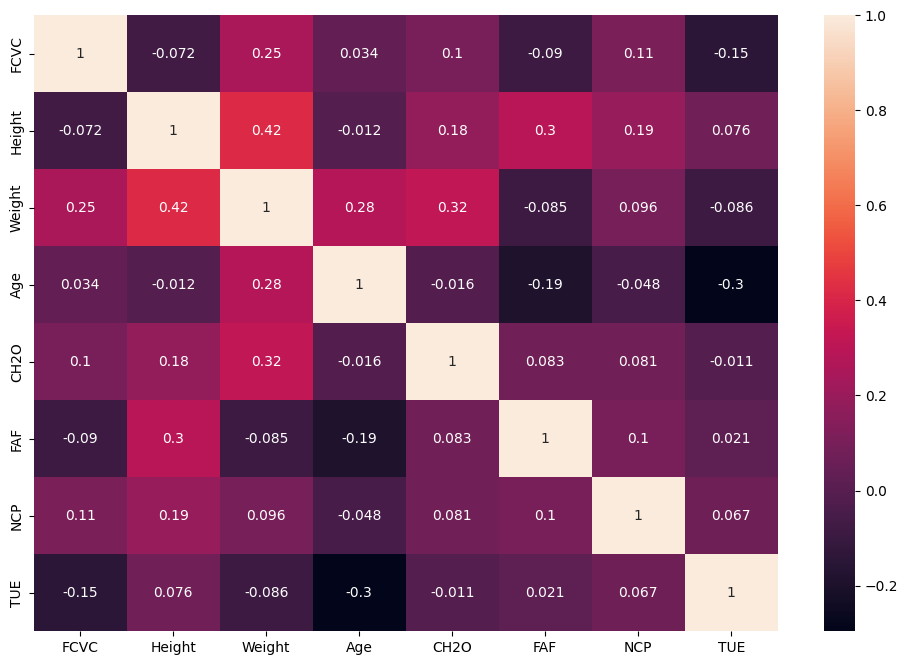

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[list(num_cols)].corr() ,annot=True)

In [ ]:
###handelling outliers
#Age
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
IQR = q3 - q1
df.loc[df['Age'] > q3 + 1.5 * IQR, 'Age'] = q3 + 1.5 * IQR
df.loc[df['Age'] < q1 - 1.5 * IQR, 'Age'] = q1 - 1.5 * IQR

In [ ]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# X,y = preprocess(df.drop(columns='id'))

In [ ]:
import functions

# Call the function from functions.py
df_ = functions.preprocess(df.drop(columns='id'))


NameError: name 'pd' is not defined

In [ ]:
df_.corr()

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_.corr(),annot=True)

In [ ]:
#MTRANS_Automobile
import numpy as np
df_log_transformed = df_.copy()
num_cols = list(num_cols)
# Apply log1p transformation to numerical columns
df_log_transformed[num_cols] = np.log1p(df_log_transformed[num_cols])

In [ ]:
df_log_transformed['Age']

In [ ]:
X = df_log_transformed.drop(columns=['MTRANS_Automobile' ,'NObeyesdad' ,'MTRANS_Motorbike' ])
y = df_log_transformed['NObeyesdad']

 Apply Smote

In [ ]:
smote = SMOTE()
resample_X , resample_y = smote.fit_resample(X,y)
counts = resample_y.value_counts()

In [ ]:
plt.figure(figsize=(12,9))
plt.pie(counts , labels =target_counts.index , autopct='%1.1f%%' , shadow=True )
plt.show()

In [ ]:
sc = StandardScaler()
resample_X_scl = sc.fit_transform(resample_X)

In [ ]:
X_train , X_test , y_train ,y_test = train_test_split(resample_X , resample_y ,random_state=42 , shuffle=True)

In [ ]:
list(num_cols)

In [ ]:
RF = RandomForestClassifier(n_estimators=400 , random_state=42)

# cross-validation
cv_scores = cross_val_score(RF, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
RF.fit(X_train, y_train)
y_pred = RF.predict((X_test))
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))



In [ ]:
# !pip install gradio

In [ ]:
import gradio as gr

In [ ]:
gr.Interface

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


y_trainc = to_categorical(y_train)
y_testc = to_categorical(y_test)
# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Add dropout to prevent overfitting

# Second hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer (number of classes in 'NObeyesdad')
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,759 (42.03 KB)

 Trainable params: 10,759 (42.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_trainc, y_trainc, validation_data=(X_test, y_test), epochs=50, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_testc, y_testc)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1614 - loss: 4.3641 - val_accuracy: 0.3285 - val_loss: 1.5518
Epoch 2/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2723 - loss: 1.6349 - val_accuracy: 0.4456 - val_loss: 1.3151
Epoch 3/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3361 - loss: 1.4473 - val_accuracy: 0.4974 - val_loss: 1.0843
Epoch 4/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4869 - loss: 1.1734 - val_accuracy: 0.6752 - val_loss: 0.7968
Epoch 5/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6179 - loss: 0.9041 - val_accuracy: 0.7191 - val_loss: 0.7041
Epoch 6/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6705 - loss: 0.7985 - val_accuracy: 0.7433 - val_loss: 0.6454
Epoch 7/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7010 - loss: 0.7457 - val_accuracy: 0.7626 - val_loss: 0.6207
Epoch 8/50
664/664 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7285 - loss: 0.6930 - val_accuracy: 0.

In [ ]:
import pickle
file_name ='Obesity_Risk_Prediction.sav'
pickle.dump(RF ,open(file_name,'wb'))

In [ ]:
#!pip install streamlit

In [ ]:
import streamlit

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

In [ ]:
!unzip /content/app.zip

In [ ]:
1234//10

123